In [11]:
import dask
import numpy as np
from dask import array as da
from numba import vectorize
import matplotlib.pyplot as plt
from dask.distributed import Client, progress
from src.numba_version import compute_mandelbrot_set_vectorized_wrapper

In [2]:
client = Client(threads_per_worker=4, n_workers=2)
client

/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 60870 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:60870/status,
Dashboard: http://127.0.0.1:60870/status,Workers: 2
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:60871,Workers: 0
Dashboard: http://127.0.0.1:60870/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:60878,Total threads: 4
Dashboard: http://127.0.0.1:60879/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:60874,


In [3]:
def initialise_meshgrid(p_re, p_im):
    """
    Initialise the meshgrid used to calculate the values of the Mandelbrot set.
    """
    # a little help from ChatGPT
    real_vals = np.linspace(-2.0, 1.0, p_re)
    imag_vals = np.linspace(1.5, -1.5, p_im)
    
    # mesh grid
    Re, Im = np.meshgrid(real_vals, imag_vals)
    C = Re + 1j * Im
    
    return C.astype(np.complex128)

In [4]:
C = initialise_meshgrid(1000, 1000)

# make dask array
dask_C = da.from_array(C, chunks=500)
dask_C

dask.array<array, shape=(1000, 1000), dtype=complex128, chunksize=(500, 500), chunktype=numpy.ndarray>

In [5]:
# def compute_mandelbrot_wrapper(c, I=100, T=2):
#     return compute_mandelbrot_set_vectorized(c, I, T)

In [6]:
# future = client.map(compute_mandelbrot_wrapper, (dask_C.chunks))

In [7]:
# client.gather(future)

In [8]:
if __name__ == "__main__":
    mandelbrot = da.map_blocks(compute_mandelbrot_set_vectorized_wrapper, dask_C, dtype=C.dtype)
    mandelbrot = mandelbrot.compute(scheduler="processes")

mandelbrot

func:'compute_mandelbrot_set_vectorized' took: 0.0000 sec


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


func:'compute_mandelbrot_set_vectorized' took: 0.0069 sec
func:'compute_mandelbrot_set_vectorized' took: 0.0055 sec
func:'compute_mandelbrot_set_vectorized' took: 0.0063 sec
func:'compute_mandelbrot_set_vectorized' took: 0.0056 sec


array([[0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01],
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01],
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01],
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01],
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01]], shape=(1000, 1000))

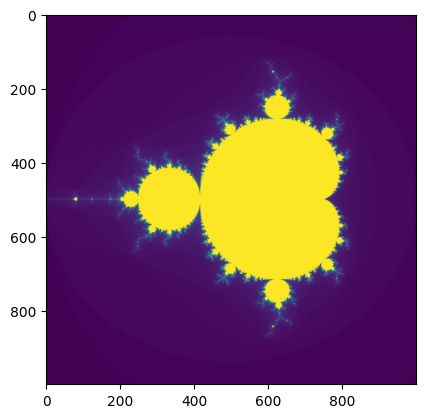

In [9]:
plt.imshow(mandelbrot)

In [10]:
# if __name__ == "__main__":
    # mandelbrot.compute(scheduler="processes")